In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run42-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20210802-RUN42-BCRh-ALL-DataSheet.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,HEK cells,RACE,Constant,Isotype,Sample
0,N719_S502,TEST1-onlyprimers,NaN,NaN,NaN,NaN,NaN,NaN,run42,S15,...,-,-,-,Empty well,no,no,no,no,-,TEST1-onlyprimers_S15
1,N720_S502,TEST2-onlyprimers,NaN,NaN,NaN,NaN,NaN,NaN,run42,S16,...,-,-,-,Empty well,no,no,no,no,-,TEST2-onlyprimers_S16
2,N719_S507,TEST3-empty,NaN,NaN,NaN,NaN,NaN,NaN,run42,S79,...,-,-,-,Empty well,no,no,no,no,-,TEST3-empty_S79
3,N720_S507,TEST4-empty,NaN,NaN,NaN,NaN,NaN,NaN,run42,S80,...,-,-,-,Empty well,no,no,no,no,-,TEST4-empty_S80
4,N711_S502,MYO201base-B2Q,NaN,NaN,NaN,NaN,NaN,NaN,run42,S9,...,human,BCRh,MYO201,Week 0,yes,no,no,no,BCRh,MYO201base-B2Q_S9


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "IGH" in x]
myfiles

['cdr3-clones-DOMINO-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-Presynoviomics-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-Q5_test-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-RACE-Constant-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-RACE-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,DO-051V1-CD24m-U_S113,CAKVPVLPYFDWWGQGTLVT,299
1,DO-051V1-CD24m-U_S113,CARGHLYSYGSRFDYWGQGTPVT,298
2,DO-051V1-CD24m-U_S113,CARGGLRSLEWLIGYWGQGTLVT,280
3,DO-051V1-CD24m-U_S113,CARDKEIVYRADTAFPFDPWGQGTLVT,232
4,DO-051V1-CD24m-U_S113,CVRDYSSDYYGLDAFDIWGQGTMVT,230


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
4973,ID645t0-SP-R-J_S60,RTRNPVTYYYYYYMDVWGKGTTVT,1
4974,ID645t0-SP-R-J_S60,RTTGYYDFWSGTSPFDYWGQGTLVT,1
4975,ID645t0-SP-R-J_S60,YARDDSSGYYLSWGQGTLVT,1
4976,ID645t0-SP-R-J_S60,YARDGTDWGQGTLVT,1
4977,ID645t0-SP-R-J_S60,YARHWFDPWGQGTLVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,HEK cells,RACE,Constant,Isotype
0,DO-051V1-CD24m-U_S113,CAKVPVLPYFDWWGQGTLVT,299,N701_S513,DO-051V1-CD24m-U,NaN,NaN,NaN,NaN,NaN,...,DOMINO,human,BCRh,DO-051V1,CD24-,yes,no,no,no,BCRh
1,DO-051V1-CD24m-U_S113,CARGHLYSYGSRFDYWGQGTPVT,298,N701_S513,DO-051V1-CD24m-U,NaN,NaN,NaN,NaN,NaN,...,DOMINO,human,BCRh,DO-051V1,CD24-,yes,no,no,no,BCRh
2,DO-051V1-CD24m-U_S113,CARGGLRSLEWLIGYWGQGTLVT,280,N701_S513,DO-051V1-CD24m-U,NaN,NaN,NaN,NaN,NaN,...,DOMINO,human,BCRh,DO-051V1,CD24-,yes,no,no,no,BCRh
3,DO-051V1-CD24m-U_S113,CARDKEIVYRADTAFPFDPWGQGTLVT,232,N701_S513,DO-051V1-CD24m-U,NaN,NaN,NaN,NaN,NaN,...,DOMINO,human,BCRh,DO-051V1,CD24-,yes,no,no,no,BCRh
4,DO-051V1-CD24m-U_S113,CVRDYSSDYYGLDAFDIWGQGTMVT,230,N701_S513,DO-051V1-CD24m-U,NaN,NaN,NaN,NaN,NaN,...,DOMINO,human,BCRh,DO-051V1,CD24-,yes,no,no,no,BCRh


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,BB4261,BB4261-PB-B_S119,CAAAPEFVKYYDFWSGFDYWGQGTLVT,1
1,BB4261,BB4261-PB-B_S119,CAAARFSTYYYDSSDAFDIWGQGTMVT,2
2,BB4261,BB4261-PB-B_S119,CAAARPLYYYYYMDVWGKGTTVT,1
3,BB4261,BB4261-PB-B_S119,CAAAYCGGDCYSFDYWGQGTLVT,2
4,BB4261,BB4261-PB-B_S119,CAAEDTAMVTPLGAFDIWGQGTMVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,BB4261-PB-B_S119,10957
1,BB4726-PB-B_S112,16122
2,BB5513-PB-B_S116,4630
3,BB5661-LN-B2_S115,22584
4,BB6423-PB-B_S117,7031


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,BB4261,BB4261-PB-B_S119,CAAAPEFVKYYDFWSGFDYWGQGTLVT,1,10957
1,BB4261,BB4261-PB-B_S119,CAAARFSTYYYDSSDAFDIWGQGTMVT,2,10957
2,BB4261,BB4261-PB-B_S119,CAAARPLYYYYYMDVWGKGTTVT,1,10957
3,BB4261,BB4261-PB-B_S119,CAAAYCGGDCYSFDYWGQGTLVT,2,10957
4,BB4261,BB4261-PB-B_S119,CAAEDTAMVTPLGAFDIWGQGTMVT,1,10957


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
172098,MYO201,MYO201week52-B2Q_S11,FASDRNPAYNGDYYFEYWGQGTLVT,1,3141
172099,MYO201,MYO201week52-B2Q_S11,PVVIAIRGLDPGLWYWGQGTLVT,1,3141
172100,MYO201,MYO201week52-B2Q_S11,SWASSVGYNWNDGGYYYMDVWGKGTTVT,1,3141
172101,MYO201,MYO201week52-B2Q_S11,YARGNGAARPFDYWGQGTLVT,1,3141
172102,MYO201,MYO201week52-B2Q_S11,YTRDRSAVAVAGPTSDYWGQGTLVT,1,3141


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,BB4261,BB4261-PB-B_S119,CAAAPEFVKYYDFWSGFDYWGQGTLVT,1,10957,0.009127
1,BB4261,BB4261-PB-B_S119,CAAARFSTYYYDSSDAFDIWGQGTMVT,2,10957,0.018253
2,BB4261,BB4261-PB-B_S119,CAAARPLYYYYYMDVWGKGTTVT,1,10957,0.009127
3,BB4261,BB4261-PB-B_S119,CAAAYCGGDCYSFDYWGQGTLVT,2,10957,0.018253
4,BB4261,BB4261-PB-B_S119,CAAEDTAMVTPLGAFDIWGQGTMVT,1,10957,0.009127


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['BB4261-PB-B_S119',
 'BB4726-PB-B_S112',
 'BB5513-PB-B_S116',
 'BB5661-LN-B2_S115',
 'BB6423-PB-B_S117',
 'BB6674-PB-B_S118',
 'DO-051V1-CD24m-U_S113',
 'DO-051V1-CD24p-U_S143',
 'DO-051V1-U_S141',
 'DO-051V1-plasb-U_S114']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,BB4261-PB-B_S119,BB4726-PB-B_S112,0.036506,0.012405
1,BB4261-PB-B_S119,BB5513-PB-B_S116,0.000000,0.000000
2,BB4261-PB-B_S119,BB5661-LN-B2_S115,0.009127,0.004428
3,BB4261-PB-B_S119,BB6423-PB-B_S117,0.000000,0.000000
4,BB4261-PB-B_S119,BB6674-PB-B_S118,0.000000,0.000000


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,BB4261-PB-B_S119,BB4726-PB-B_S112,0.036506,0.012405,BB4261,BB4726
1,ID645t0-R-IgA_S46,BB4726-PB-B_S112,0.114943,0.006203,ID645t0,BB4726
2,ID645t0-R-J_S47,BB4726-PB-B_S112,0.860479,0.006203,ID645t0,BB4726
3,MYO201week52-B2Q_S11,BB4726-PB-B_S112,0.063674,0.012405,MYO201,BB4726
4,BB5513-PB-B_S116,BB4726-PB-B_S112,0.043197,0.012405,BB5513,BB4726


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1439,ID598t0-R-IgG_S93,ID598t0-R-IgG-C2_S94,97.474935,95.721144,ID598t0,ID598t0
1,2637,ID645t0-R-IgA_S46,ID645t0-R-J_S47,81.724138,71.081746,ID645t0,ID645t0
2,1771,ID598t0-R2-IgM_S31,ID598t0-R2-J_S42,70.880638,53.283523,ID598t0,ID598t0
3,744,ID400t0-mxrt-R-IgM_S75,ID400t0-mxrt-R-J_S78,73.247141,51.205857,ID400t0,ID400t0
4,960,ID594t0-mxrt-R-IgM_S62,ID594t0-mxrt-R-J_S73,86.768677,49.233439,ID594t0,ID594t0


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1439,ID598t0-R-IgG_S93,ID598t0-R-IgG-C2_S94,97.474935,95.721144,ID598t0,ID598t0,same
1,2637,ID645t0-R-IgA_S46,ID645t0-R-J_S47,81.724138,71.081746,ID645t0,ID645t0,same
2,1771,ID598t0-R2-IgM_S31,ID598t0-R2-J_S42,70.880638,53.283523,ID598t0,ID598t0,same
3,744,ID400t0-mxrt-R-IgM_S75,ID400t0-mxrt-R-J_S78,73.247141,51.205857,ID400t0,ID400t0,same
4,960,ID594t0-mxrt-R-IgM_S62,ID594t0-mxrt-R-J_S73,86.768677,49.233439,ID594t0,ID594t0,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run42-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1439,ID598t0-R-IgG_S93,ID598t0-R-IgG-C2_S94,97.474935,95.721144,ID598t0,ID598t0,same
1,1,2637,ID645t0-R-IgA_S46,ID645t0-R-J_S47,81.724138,71.081746,ID645t0,ID645t0,same
2,2,1771,ID598t0-R2-IgM_S31,ID598t0-R2-J_S42,70.880638,53.283523,ID598t0,ID598t0,same
3,3,744,ID400t0-mxrt-R-IgM_S75,ID400t0-mxrt-R-J_S78,73.247141,51.205857,ID400t0,ID400t0,same
4,4,960,ID594t0-mxrt-R-IgM_S62,ID594t0-mxrt-R-J_S73,86.768677,49.233439,ID594t0,ID594t0,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1439,ID598t0-R-IgG_S93,ID598t0-R-IgG-C2_S94,97.474935,95.721144,ID598t0,ID598t0,same,ID598t0-R-IgG_S93->ID598t0-R-IgG-C2_S94,purple
1,1,2637,ID645t0-R-IgA_S46,ID645t0-R-J_S47,81.724138,71.081746,ID645t0,ID645t0,same,ID645t0-R-IgA_S46->ID645t0-R-J_S47,purple
2,2,1771,ID598t0-R2-IgM_S31,ID598t0-R2-J_S42,70.880638,53.283523,ID598t0,ID598t0,same,ID598t0-R2-IgM_S31->ID598t0-R2-J_S42,purple
3,3,744,ID400t0-mxrt-R-IgM_S75,ID400t0-mxrt-R-J_S78,73.247141,51.205857,ID400t0,ID400t0,same,ID400t0-mxrt-R-IgM_S75->ID400t0-mxrt-R-J_S78,purple
4,4,960,ID594t0-mxrt-R-IgM_S62,ID594t0-mxrt-R-J_S73,86.768677,49.233439,ID594t0,ID594t0,same,ID594t0-mxrt-R-IgM_S62->ID594t0-mxrt-R-J_S73,purple


Wrote run42-IGH-HUMAN-shared-clones-all.pdf to disk


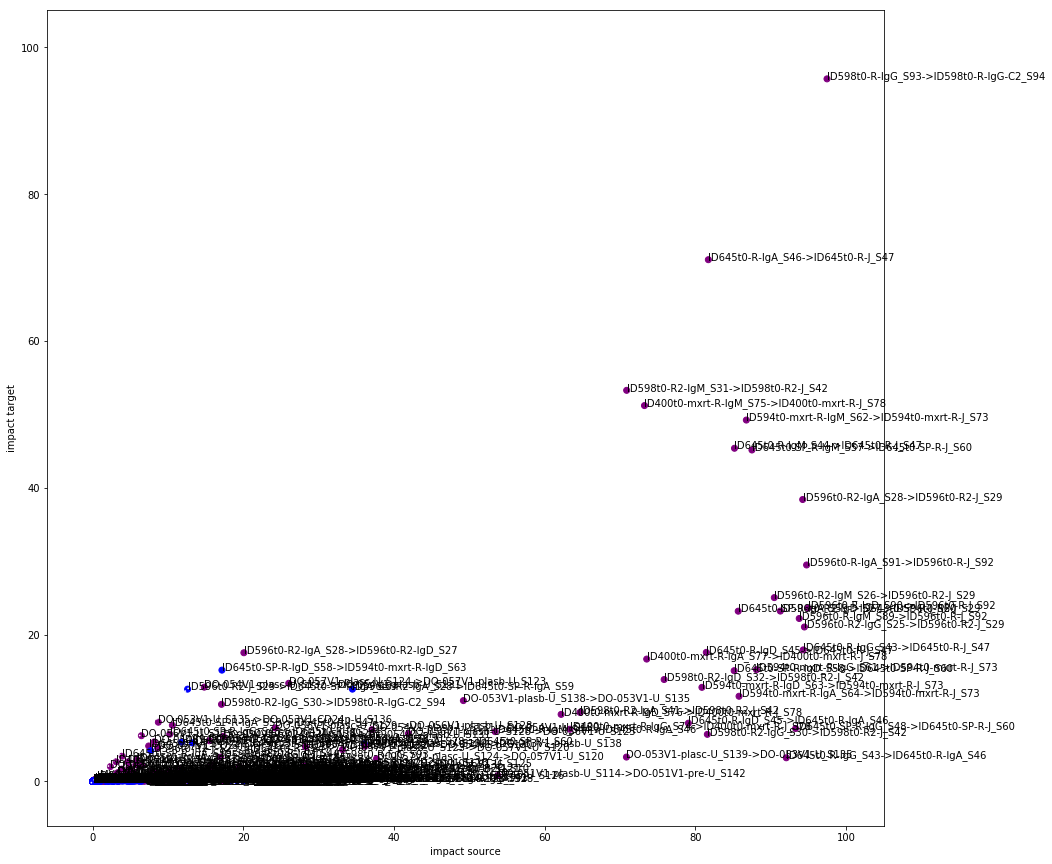

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,20,ID645t0-SP-R-IgD_S58,ID594t0-mxrt-R-IgD_S63,17.158705,15.161401,different,ID645t0-SP-R-IgD_S58->ID594t0-mxrt-R-IgD_S63,blue
1,26,ID596t0-R2-IgA_S28,ID645t0-SP-R-IgA_S59,34.481196,12.570006,different,ID596t0-R2-IgA_S28->ID645t0-SP-R-IgA_S59,blue
2,27,ID596t0-R2-J_S29,ID645t0-SP-R-IgA_S59,12.604263,12.570006,different,ID596t0-R2-J_S29->ID645t0-SP-R-IgA_S59,blue
3,48,ID594t0-mxrt-R-IgD_S63,ID645t0-SP-R-IgA_S59,11.813187,5.351587,different,ID594t0-mxrt-R-IgD_S63->ID645t0-SP-R-IgA_S59,blue
4,49,ID596t0-R2-J_S29,ID645t0-SP-R-J_S60,13.215941,5.255959,different,ID596t0-R2-J_S29->ID645t0-SP-R-J_S60,blue


Wrote run42-IGH-HUMAN-shared-clones-different-ids.pdf to disk


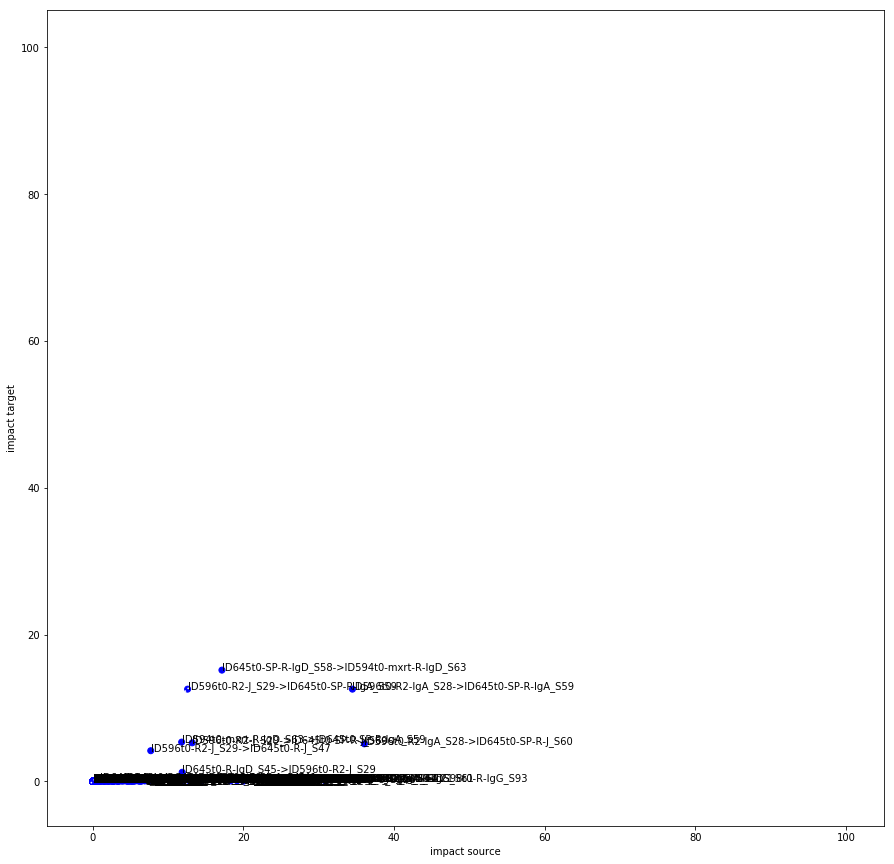

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,BB4261,BB4261-PB-B_S119,CAAAPEFVKYYDFWSGFDYWGQGTLVT,1,10957,0.009127
1,BB4261,BB4261-PB-B_S119,CAAARFSTYYYDSSDAFDIWGQGTMVT,2,10957,0.018253
2,BB4261,BB4261-PB-B_S119,CAAARPLYYYYYMDVWGKGTTVT,1,10957,0.009127
3,BB4261,BB4261-PB-B_S119,CAAAYCGGDCYSFDYWGQGTLVT,2,10957,0.018253
4,BB4261,BB4261-PB-B_S119,CAAEDTAMVTPLGAFDIWGQGTMVT,1,10957,0.009127


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient            Sample                       
                         nunique     names nunique                  names
cdr3pep                                                                  
AALAASGTYYYYTMDIWGQGTTVT       1  DO-054V1       1        DO-054V1-U_S130
AFSPELSYRISWGQGTLVT            1  DO-053V1       1        DO-053V1-U_S135
ALGYPKSYYSYNMDVWGQGTTVT        1  DO-057V1       1  DO-057V1-plasb-U_S123
ARRGAADYYYYGMDVWGQGTTVT        1  DO-054V1       1        DO-054V1-U_S130
AVAGGMDVWGQGTTVT               1  DO-056V1       1  DO-056V1-CD24p-U_S126

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                   cdr3pep           BB4261           BB4726  \
Sample                            BB4261-PB-B_S119 BB4726-PB-B_S112   
0        AALAASGTYYYYTMDIWGQGTTVT              NaN              NaN   
1             AFSPELSYRISWGQGTLVT              NaN              NaN   
2         ALGYPKSYYSYNMDVWGQGTTVT              NaN              NaN   
3         ARRGAADYYYYGMDVWGQGTTVT              NaN              NaN   
4                AVAGGMDVWGQGTTVT              NaN              NaN   

Patient           BB5513            BB5661           BB6423           BB6674  \
Sample  BB5513-PB-B_S116 BB5661-LN-B2_S115 BB6423-PB-B_S117 BB6674-PB-B_S118   
0                    NaN               NaN              NaN              NaN   
1                    NaN               NaN              NaN              NaN   
2                    NaN               NaN              NaN              NaN   
3                    NaN               NaN              NaN              NaN   
4                    NaN               NaN              NaN              NaN   

Patient              DO-051V1                                        \
Sample  DO-051V1-CD24m-U_S113 DO-051V1-CD24p-U_S143 DO-051V1-U_S141   
0                         NaN                   NaN             NaN   
1                         NaN                   NaN             NaN   
2                         NaN                   NaN             NaN   
3                         NaN                   NaN             NaN   
4                         NaN                   NaN             NaN   

Patient         ...                       ID645t0                       \
Sample          ...          ID645t0-SP-R-IgD_S58 ID645t0-SP-R-IgG_S48   
0               ...                           NaN                  NaN   
1               ...                           NaN                  NaN   
2               ...                           NaN                  NaN   
3               ...                           NaN                  NaN   
4               ...                           NaN                  NaN   

Patient                                                      MYO101  \
Sample  ID645t0-SP-R-IgM_S57 ID645t0-SP-R-J_S60 MYO101base2-B2Q_S14   
0                        NaN                NaN                 NaN   
1                        NaN                NaN                 NaN   
2                        NaN                NaN                 NaN   
3                        NaN                NaN                 NaN   
4                        NaN                NaN                 NaN   

Patient               MYO104               MYO114            MYO201  \
Sample  MYO104week52-B2Q_S12 MYO114week52-B2Q_S13 MYO201base-B2Q_S9   
0                        NaN                  NaN               NaN   
1                        NaN                  NaN               NaN   
2                        NaN                  NaN               NaN   
3                        NaN                  NaN               NaN   
4                        NaN                  NaN               NaN   

Patient                                         
Sample  MYO201end-B2Q_S10 MYO201week52-B2Q_S11  
0                     NaN                  NaN  
1                     NaN                  NaN  
2                     NaN                  NaN  
3                     NaN                  NaN  
4                     NaN                  NaN  

[5 rows x 77 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index                cdr3pep Patient  \
                                 nunique   
0  165741              CWGQGTLVT      10   
1   89480     CARGHYGMDVWGQGTTVT       5   
2  145708  CATGDVGSVGFDYWGQGTLVT       4   
3  100060     CARGYYGMDVWGQGTTVT       4   
4   53134        CARDLDYWGQGTLVT       4   

                                                      Sample  \
                                               names nunique   
0  ID594t0, ID645t0, BB4261, DO-057V1, ID598t0, I...      14   
1    DO-057V1, ID598t0, DO-051V1, DO-054V1, DO-053V1       9   
2                 ID596t0, ID645t0, ID598t0, ID400t0       6   
3             DO-054V1, DO-053V1, DO-057V1, DO-056V1       5   
4                 DO-054V1, MYO201, BB4726, DO-052V0       4   

                                                               BB4261  \
                                               names BB4261-PB-B_S119   
0  DO-056V1-plasc-U_S129, ID645t0-SP-R-J_S60, ID5...         0.036506   
1  ID598t0-R2-J_S42, DO-051V1-pre-U_S142, ID598t0...              NaN   
2  ID598t0-R2-J_S42, ID596t0-R-J_S92, ID645t0-R-I...              NaN   
3  DO-057V1-CD24p-U_S121, DO-057V1-plasc-U_S124, ...              NaN   
4  MYO201week52-B2Q_S11, BB4726-PB-B_S112, DO-052...              NaN   

            BB4726           BB5513            BB5661         ...           \
  BB4726-PB-B_S112 BB5513-PB-B_S116 BB5661-LN-B2_S115         ...            
0              NaN              NaN               NaN         ...            
1              NaN              NaN               NaN         ...            
2              NaN              NaN               NaN         ...            
3              NaN              NaN               NaN         ...            
4         0.006203              NaN               NaN         ...            

               ID645t0                                            \
  ID645t0-SP-R-IgD_S58 ID645t0-SP-R-IgG_S48 ID645t0-SP-R-IgM_S57   
0                  NaN              0.19685                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

                                  MYO101               MYO104  \
  ID645t0-SP-R-J_S60 MYO101base2-B2Q_S14 MYO104week52-B2Q_S12   
0           0.019539                 NaN                  NaN   
1                NaN                 NaN                  NaN   
2                NaN                 NaN                  NaN   
3                NaN                 NaN                  NaN   
4                NaN                 NaN                  NaN   

                MYO114            MYO201                    \
  MYO114week52-B2Q_S13 MYO201base-B2Q_S9 MYO201end-B2Q_S10   
0                  NaN               NaN               NaN   
1                  NaN               NaN               NaN   
2                  NaN               NaN               NaN   
3                  NaN               NaN               NaN   
4                  NaN               NaN               NaN   

                        
  MYO201week52-B2Q_S11  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4             0.031837  

[5 rows x 82 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 166997
cdr3's in > 1 sample: 4572


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run42-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
